Replication of EIF1AX/EIF1AY expression patterns in Human Protein Atlas RNA-seq data

In [159]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

import msyexp.datasets as ds
import msyexp.general as general
import msyexp.ratios as yr
import msyexp.plotfuncs as pf
import msyexp.diffexp as yd

%matplotlib inline

In [10]:
outdir = '{}/eif1a_HPA_replication'.format(ds.paths.NBOUTDIR)
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [3]:
data = ds.get_hpa_data(males_only=False)
meta = ds.get_metadata('hpa')
meta_ = meta.set_index('SAMPID')

In [4]:
meta

,ENA_SAMPLE,SAMPID,TISSUE_HPA,SEX,TISSUE
0,ERS326931,colon_a,Colon,male,Colon - Transverse
1,ERS326978,colon_f,Colon,male,Colon - Transverse
2,ERS326990,colon_b,Colon,female,Colon - Transverse
3,ERS326994,colon_d,Colon,male,Colon - Transverse
4,ERS327001,colon_c,Colon,female,Colon - Transverse
...,...,...,...,...,...
117,ERS526277,smoothmuscle_8c,Smooth Muscle,female,NaN
118,ERS526281,smoothmuscle_8a,Smooth Muscle,female,NaN
119,ERS526278,tonsil_8e1,Tonsil,male,NaN
120,ERS526283,tonsil_8a1,Tonsil,female,NaN


In [5]:
data.head()

,fallopiantube_5a,heart_6a,lymphnode_5c,kidney_a,spleen_3b,testis_7e,smallintestine_4d,duodenum_4c,duodenum_4b,lymphnode_5b,...,fat_e,gallbladder_5b,colon_8a,fat_x1,ovary_8a,gallbladder_5a,lung_4a,colon_d,colon_8b,placenta_3a
A1BG,0.704270,0.669441,0.702779,0.843635,4.236174,0.406098,0.353648,0.945126,1.456282,1.772412,...,0.674719,0.237803,0.211095,0.822709,0.291328,0.963908,3.969467,0.878944,0.231189,0.860654
A1CF,0.046495,0.000000,0.089216,22.719403,0.046399,0.057793,32.334047,26.598769,33.410611,0.041047,...,0.014792,12.907205,7.633758,0.112728,0.210020,8.318549,0.015959,25.414759,14.363907,0.057216
A2M,383.787454,196.078576,141.105080,218.769364,334.906824,65.595538,250.676401,190.620418,173.118256,278.062560,...,365.523644,662.569978,350.381925,334.620671,117.809157,829.469500,1849.794796,166.756257,321.614256,442.104735
A2ML1,1.175975,0.092359,0.160913,0.033381,0.089609,5.540527,0.030712,0.000000,0.000000,0.043312,...,0.409034,0.372032,0.040104,0.143082,0.344371,0.133250,0.201385,0.023383,0.024750,0.476247
A3GALT2,0.000000,0.000000,0.000000,0.000000,0.172178,1.206003,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.176705,0.000000,0.122605,0.130630,0.088174,0.000000,0.081135,0.050524,0.000000


In [11]:
mdata, fdata = general.split_male_female_samples(data, meta)
mdata0 = mdata.copy()
fdata0 = fdata.copy()

In [7]:
print(mdata.shape)
print(fdata.shape)

(19732, 52)
(19732, 70)


### Plot Y/X expression ratios in male samples

Subset to just tissues found in GTEx

In [219]:
mdata = mdata.loc[:, meta_.loc[mdata.columns, 'TISSUE'].notnull()]
print(mdata.shape)

(19732, 37)


In [220]:
ratios = yr.calc_ratios(mdata)
df = pd.DataFrame({'EIF1AY/EIF1AX':ratios.loc['EIF1AY/EIF1AX'],
                   'DDX3Y/DDX3X':ratios.loc['DDX3Y/DDX3X'],
                   'ZFY/ZFX':ratios.loc['ZFY/ZFX']})
df['TISSUE'] = meta_.loc[df.index, 'TISSUE_HPA']
df.head()

,EIF1AY/EIF1AX,DDX3Y/DDX3X,ZFY/ZFX,TISSUE
heart_6a,2.162046,-1.469869,-0.913335,Heart
spleen_3b,0.700950,-0.968786,-0.478260,Spleen
testis_7e,0.003900,-0.156400,0.472614,Testis
smallintestine_4d,-0.259645,-1.906831,-0.429847,Small Intestine
smallintestine_4b,-0.469565,-1.360333,-0.294796,Small Intestine


In [221]:
# tissue order
mdata0 = mdata.loc[:, meta_.loc[mdata.columns, 'TISSUE'].notnull()]
meta_0 = meta_.loc[mdata0.columns].copy()
meta_0['TISSUE'] = pd.Categorical(meta_0['TISSUE'], pf.TISSUE_ORDER)
meta_0 = meta_0.sort_values('TISSUE')
t_order = list(meta_0['TISSUE_HPA'].unique())
t_order

['Kidney',
 'Prostate',
 'Salivary Gland',
 'Small Intestine',
 'Colon',
 'Stomach',
 'Skin',
 'Esophagus',
 'Pancreas',
 'Lung',
 'Heart',
 'Skeletal Muscle',
 'Spleen',
 'Liver',
 'Brain',
 'Testis']

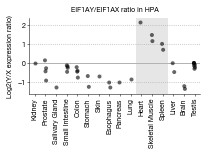

In [233]:
fig, ax = plt.subplots(figsize=(3, 2))
fig.subplots_adjust(bottom=0.35, left=0.15, right=0.94)

ax = sns.stripplot(x='TISSUE', y='EIF1AY/EIF1AX', data=df, ax=ax,
                   alpha=0.6, s=4, color='k', order=t_order, zorder=3)
ax.set_yticks([-1, 0, 1, 2])
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.set_ylim(ylim)
ax.set_xlim(xlim)

ax.plot(xlim, [0, 0], ls='-', color='0.7', lw=1)

x0 = t_order.index('Heart')
p = plt.Rectangle((x0-0.5, ylim[0]), 3, ylim[1]-ylim[0], 
                  edgecolor='none', facecolor='0.9', zorder=1)
ax.add_patch(p)

ax.grid(axis='y', ls=':', zorder=1)
ax.set_xlabel('')
ax.set_ylabel('Log2(Y/X expression ratio)')
ax.set_title('EIF1AY/EIF1AX ratio in HPA')
ax = pf.format_spines(ax)
ax = pf.rotate_ticklabels(ax, 'x')

ax = pf.format_axis_labels(ax, ticklabsize=7, labsize=7)

fig.savefig("{}/EIF1AY_YXratio_in_HPA.pdf".format(outdir))

For comparison, ZFY/ZFX, highlighting the two tissues with divergent expression (as shown in Fig. 3)

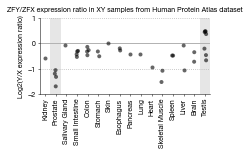

In [232]:
fig, ax = plt.subplots(figsize=(3, 2))
fig.subplots_adjust(bottom=0.35, left=0.15, right=0.94)

ax = sns.stripplot(x='TISSUE', y='ZFY/ZFX', data=df, ax=ax,
                   alpha=0.6, s=4, color='k', order=t_order, zorder=3)
ax.set_yticks([-2, -1, 0, 1])
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.set_ylim(ylim)
ax.set_xlim(xlim)

ax.plot(xlim, [0, 0], ls='-', color='0.7', lw=1)

x0 = t_order.index('Prostate')
x1 = t_order.index('Testis')
p0 = plt.Rectangle((x0-0.5, ylim[0]), 1, ylim[1]-ylim[0], 
                   edgecolor='none', facecolor='0.9', zorder=1)
p1 = plt.Rectangle((x1-0.5, ylim[0]), 1, ylim[1]-ylim[0], 
                   edgecolor='none', facecolor='0.9', zorder=1)
ax.add_patch(p0)
ax.add_patch(p1)

ax.grid(axis='y', ls=':', zorder=1)
ax.set_xlabel('')
ax.set_ylabel('Log2(Y/X expression ratio)')
ax.set_title('ZFY/ZFX expression ratio in XY samples from Human Protein Atlas dataset')
ax = pf.format_spines(ax)
ax = pf.rotate_ticklabels(ax, 'x')

ax = pf.format_axis_labels(ax, ticklabsize=7, labsize=7)

fig.savefig("{}/ZFY_YXratio_in_HPA.pdf".format(outdir))

For comparison, DDX3Y/DDX3X...

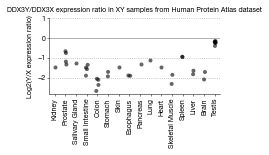

In [231]:
fig, ax = plt.subplots(figsize=(3, 2))
fig.subplots_adjust(bottom=0.35, left=0.15, right=0.94)

ax = sns.stripplot(x='TISSUE', y='DDX3Y/DDX3X', data=df, ax=ax,
                   alpha=0.6, s=4, color='k', order=t_order, zorder=3)
ax.set_yticks([-2, -1, 0, 1])
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.set_ylim(ylim)
ax.set_xlim(xlim)

ax.plot(xlim, [0, 0], ls='-', color='0.7', lw=1)

ax.grid(axis='y', ls=':', zorder=1)
ax.set_xlabel('')
ax.set_ylabel('Log2(Y/X expression ratio)')
ax.set_title('DDX3Y/DDX3X expression ratio in XY samples from Human Protein Atlas dataset')
ax = pf.format_spines(ax)
ax = pf.rotate_ticklabels(ax, 'x')

ax = pf.format_axis_labels(ax, ticklabsize=7, labsize=7)

fig.savefig("{}/DDX3Y_YXratio_in_HPA.pdf".format(outdir))

### Sex bias

Get and order tissues found in both sexes

In [234]:
tissues_mf = list(set(meta_.loc[mdata.columns, 'TISSUE_HPA']) & set(meta_.loc[fdata.columns, 'TISSUE_HPA']))
tissues_mf = list(filter(lambda t: t in tissues_mf, t_order))
tissues_mf

['Kidney',
 'Salivary Gland',
 'Colon',
 'Stomach',
 'Skin',
 'Esophagus',
 'Pancreas',
 'Lung',
 'Heart',
 'Skeletal Muscle',
 'Spleen',
 'Liver',
 'Brain']

A new version of this function in `msyexp.diffexp` hard-wired for HPA data

In [237]:
def plot_xx_vs_xy_stackedbar_hpa(data, meta, gx, gy, tissues, pad=0.1,
                                 xcolor='#ead5b7', ycolor='#17659b', ax=None,
                                 bar_width=0.35):
    meta_ = meta.set_index('SAMPID')
    data = data.loc[:, meta_.loc[data.columns, 'TISSUE_HPA'].isin(tissues)].copy()
    
    df_x = data.loc[gx]
    df_xy = data.loc[gx] + data.loc[gy]
    
    xlab = '{}_TPM'.format(gx)
    xylab = '{0}+{1}_TPM'.format(gx, gy)
    
    df = pd.DataFrame({xlab:df_x, xylab:df_xy})
    df = pd.merge(df, meta[['SAMPID', 'TISSUE_HPA', 'SEX']], left_index=True, right_on='SAMPID')
    df = df.rename(columns={'TISSUE_HPA':'TISSUE'})
    
    # calculate mean XX expression
    xx_mean = df.loc[df.SEX.eq('female'), [xlab, 'TISSUE']].groupby('TISSUE').mean()
    xx_mean.columns = ['XX_mean']
    df = pd.merge(df, xx_mean, left_on='TISSUE', right_index=True)
    df[xlab] = df[xlab] / df['XX_mean']
    df[xylab] = df[xylab] / df['XX_mean']
    
    # count number of male and female samples
    mcounts = df.loc[df['SEX']=='male', 'TISSUE'].value_counts()
    fcounts = df.loc[df['SEX']=='female', 'TISSUE'].value_counts()
    
    err_quantiles = [0, 1]
    
    # collect bar heights and errors
    # X in females
    xf_group = df.loc[df.SEX.eq('female'), [xlab, 'TISSUE']].groupby('TISSUE')
    x_f_m = xf_group.mean()[xlab].reindex(tissues)
    x_f_err0 = -1*(xf_group.quantile(err_quantiles[0])[xlab].reindex(tissues) - x_f_m)
    x_f_err1 = xf_group.quantile(err_quantiles[1])[xlab].reindex(tissues) - x_f_m

    # X in males
    xym_group = df.loc[df.SEX.eq('male'), [xlab, xylab, 'TISSUE']].groupby('TISSUE')
    x_m_m = xym_group.mean()[xlab].reindex(tissues)
    xym_q0 = xym_group.quantile(err_quantiles[0])
    xym_q1 = xym_group.quantile(err_quantiles[1])
    x_m_err0 = -1*(xym_q0[xlab].reindex(tissues) - x_m_m)
    x_m_err1 = xym_q1[xlab].reindex(tissues) - x_m_m

    # X+Y in males
    xy_m_m = xym_group.mean()[xylab].reindex(tissues)
    xy_m_err0 = -1*(xym_q0[xylab].reindex(tissues) - xy_m_m)
    xy_m_err1 = xym_q1[xylab].reindex(tissues) - xy_m_m
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(3, 2))
        fig.subplots_adjust(bottom=0.35, left=0.15, right=0.94)
    else:
        fig = ax.get_figure()
        
    xs = np.arange(len(tissues))
    error_kws = {'lw':0.5, 'color':0.1}
    
    xcolor_f = xcolor_m = xcolor
    # X in females
    ax.bar(xs - 0.5*(pad+bar_width), x_f_m, width=bar_width, 
           yerr=[x_f_err0.values, x_f_err1.values],
           error_kw=error_kws, edgecolor='none', facecolor=xcolor_f)

    # X+Y in males
    ax.bar(xs + 0.5*(pad+bar_width), xy_m_m, width=bar_width, 
           yerr=[xy_m_err0.values, xy_m_err1.values],
           error_kw=error_kws, edgecolor='none', facecolor=ycolor)

    # X in males
    ax.bar(xs + 0.5*(pad+bar_width), x_m_m, width=bar_width,
               edgecolor='none', facecolor=xcolor_m)
    
    ax.set_xticks(xs)
    xlim = [-0.75, len(tissues)-0.25]
    ax.set_xlim(xlim)
    
    # annotate tissues with number of female, male samples
    tissues_ = ['{0} ({1},{2})'.format(t, fcounts[t], mcounts[t]) for t in tissues]
    ax.set_xticklabels(tissues_, rotation='vertical')
    
    ax.plot(xlim, [0.5, 0.5], lw=1, ls=':', color='w')
    ax.plot(xlim, [1, 1], lw=0.5, ls=':', color='0.7', zorder=1)
    ax.plot(xlim, [2, 2], lw=0.5, ls=':', color='0.7', zorder=1)
    ax.set_yticks([0, 0.5, 1, 2])
    
    ax.set_ylabel('Expression normalized to XX mean\n[error bars: (min, max)]')
    ax.set_title('{0}+{1} in XX vs. XY (HPA data)'.format(gx, gy))
    
    ax = pf.format_spines(ax)
    ax = pf.format_axis_labels(ax, labsize=7, ticklabsize=7)
    
    return fig, ax

In [109]:
data_h = general.housekeeping_normalize(data)

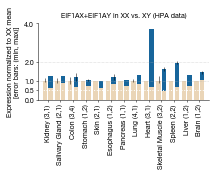

In [238]:
fig, ax = plot_xx_vs_xy_stackedbar_hpa(data_h, meta, 'EIF1AX', 'EIF1AY', tissues_mf)
ax.set_yticks([0, 0.5, 1, 2, 4])

fig.savefig("{}/EIF1AX_EIF1AY_sexbias_HPA.pdf".format(outdir))

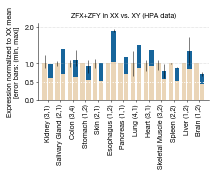

In [239]:
fig, ax = plot_xx_vs_xy_stackedbar_hpa(data_h, meta, 'ZFX', 'ZFY', tissues_mf)

fig.savefig("{}/ZFX_ZFY_sexbias_HPA.pdf".format(outdir))

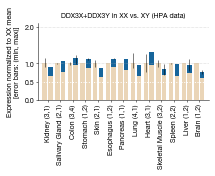

In [240]:
fig, ax = plot_xx_vs_xy_stackedbar_hpa(data_h, meta, 'DDX3X', 'DDX3Y', tissues_mf)

fig.savefig("{}/DDX3X_DDX3Y_sexbias_HPA.pdf".format(outdir))

### Scatterplot GTEx vs. HPA

For these three gene pairs, compare the tissue-level estimates of Y/X expression ratios from GTEx and HPA data

In [184]:
# summarizing log2(Y/X ratios) by mean rather than median for HPA data
# due to the small number of samples
rbt_h = yr.calc_ratios_by_tissue(mdata, meta, func='mean')

In [139]:
# load GTEx data for comparison
gdata = ds.get_gtex_data(adjusted=True)
gmeta = ds.get_metadata()
rbt_g = yr.calc_ratios_by_tissue(gdata, gmeta)

In [140]:
tissues_gh = list(set(rbt_h.columns) & set(rbt_g.columns))

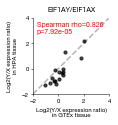

In [214]:
gx = 'EIF1AX'
gy = 'EIF1AY'

lab = '{0}/{1}'.format(gy, gx)

fig, ax = plt.subplots(figsize=(2, 2))
fig.subplots_adjust(bottom=0.35, left=0.35, top=0.88, right=0.88)
ax.scatter(rbt_g.loc[lab, tissues_gh], rbt_h.loc[lab, tissues_gh], 
           color='k', alpha=0.7, s=10, zorder=3)

xlim = pf.square_axes(ax)
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.set_ylim(xlim)

ax.plot(xlim, xlim, zorder=1, ls='--', color='0.7')

ax.set_xlabel("Log2(Y/X expression ratio)\nin GTEx tissue")
ax.set_ylabel("Log2(Y/X expression ratio)\nin HPA tissue")

r, p = ss.spearmanr(rbt_g.loc[lab, tissues_gh], rbt_h.loc[lab, tissues_gh])
xt = (xlim[1]-xlim[0])*0.05 + xlim[0]
yt = xlim[1] - (xlim[1]-xlim[0])*0.05
ax.text(xt, yt, 'Spearman rho={0:.3f}\np={1:.2e}'.format(r, p),
        horizontalalignment='left', verticalalignment='top',
        color='r', size=7)
ax.set_title('{0}'.format(lab))

ax = pf.format_axis_labels(ax, labsize=6, ticklabsize=6)
ax = pf.format_spines(ax)

fig.savefig("{0}/{1}_YX_ratio_GTEx_HPA_scatter.pdf".format(outdir, gy))

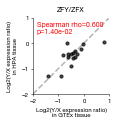

In [213]:
gx = 'ZFX'
gy = 'ZFY'

lab = '{0}/{1}'.format(gy, gx)

fig, ax = plt.subplots(figsize=(2, 2))
fig.subplots_adjust(bottom=0.35, left=0.35, top=0.88, right=0.88)
ax.scatter(rbt_g.loc[lab, tissues_gh], rbt_h.loc[lab, tissues_gh], 
           color='k', alpha=0.7, s=10, zorder=3)

xlim = pf.square_axes(ax)
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.set_ylim(xlim)

ax.plot(xlim, xlim, zorder=1, ls='--', color='0.7')

ax.set_xlabel("Log2(Y/X expression ratio)\nin GTEx tissue")
ax.set_ylabel("Log2(Y/X expression ratio)\nin HPA tissue")

r, p = ss.spearmanr(rbt_g.loc[lab, tissues_gh], rbt_h.loc[lab, tissues_gh])
xt = (xlim[1]-xlim[0])*0.05 + xlim[0]
yt = xlim[1] - (xlim[1]-xlim[0])*0.05
ax.text(xt, yt, 'Spearman rho={0:.3f}\np={1:.2e}'.format(r, p),
        horizontalalignment='left', verticalalignment='top',
        color='r', size=7)
ax.set_title('{0}'.format(lab))

ax = pf.format_axis_labels(ax, labsize=6, ticklabsize=6)
ax = pf.format_spines(ax)

fig.savefig("{0}/{1}_YX_ratio_GTEx_HPA_scatter.pdf".format(outdir, gy))

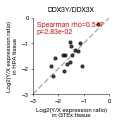

In [212]:
gx = 'DDX3X'
gy = 'DDX3Y'

lab = '{0}/{1}'.format(gy, gx)

fig, ax = plt.subplots(figsize=(2, 2))
fig.subplots_adjust(bottom=0.35, left=0.35, top=0.88, right=0.88)
ax.scatter(rbt_g.loc[lab, tissues_gh], rbt_h.loc[lab, tissues_gh], 
           color='k', alpha=0.7, s=10, zorder=3)

xlim = pf.square_axes(ax)
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.set_ylim(xlim)

ax.plot(xlim, xlim, zorder=1, ls='--', color='0.7')

ax.set_xlabel("Log2(Y/X expression ratio)\nin GTEx tissue")
ax.set_ylabel("Log2(Y/X expression ratio)\nin HPA tissue")

r, p = ss.spearmanr(rbt_g.loc[lab, tissues_gh], rbt_h.loc[lab, tissues_gh])
xt = (xlim[1]-xlim[0])*0.05 + xlim[0]
yt = xlim[1] - (xlim[1]-xlim[0])*0.05
ax.text(xt, yt, 'Spearman rho={0:.3f}\np={1:.2e}'.format(r, p),
        horizontalalignment='left', verticalalignment='top',
        color='r', size=7)
ax.set_title('{0}'.format(lab))

ax = pf.format_axis_labels(ax, labsize=6, ticklabsize=6)
ax = pf.format_spines(ax)

fig.savefig("{0}/{1}_YX_ratio_GTEx_HPA_scatter.pdf".format(outdir, gy))